<a href="https://colab.research.google.com/github/aqilahfarhah/IEF/blob/main/Holts_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(10, 1)
            Bil Banjir
Tahun                 
2001-01-01         193
2002-01-01         149
2003-01-01         236
2004-01-01         161
2005-01-01          99


<Axes: title={'center': 'Floods Data'}, xlabel='Tahun'>

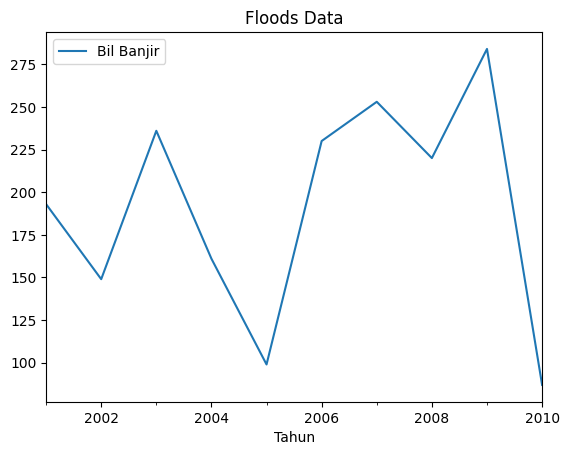

In [2]:
airline = pd.read_csv('Bil_banjir.csv',index_col='Tahun', parse_dates=True)
airline = pd.read_csv('Bil_banjir.csv',index_col='Tahun', parse_dates=True)
# finding shape of the dataframe
print(airline.shape)
# having a look at the data
print(airline.head())
# plotting the original data
airline[['Bil Banjir']].plot(title='Floods Data')

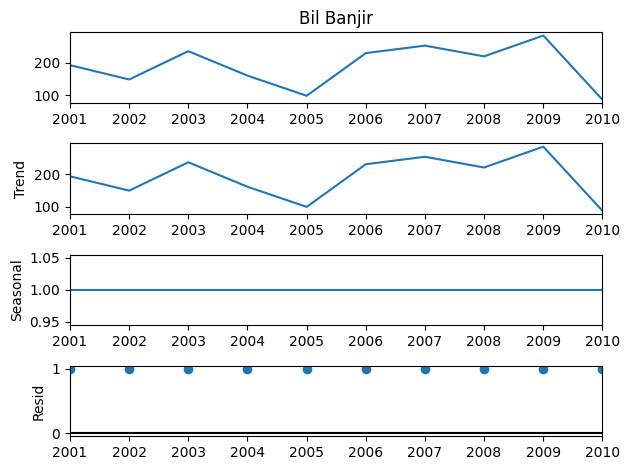

In [3]:

airline.sort_index(inplace=True) # sort the data as per the index
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(airline['Bil Banjir'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

In [4]:
# Set the frequency of the date time index as Monthly start as indicated by the data
airline.index.asfreq='MS'
# Set the value of Alpha and define m (Time Period)
m = 1
alpha = 1/(2*m)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Single Exponential Smoothing grpah'}, xlabel='Tahun'>

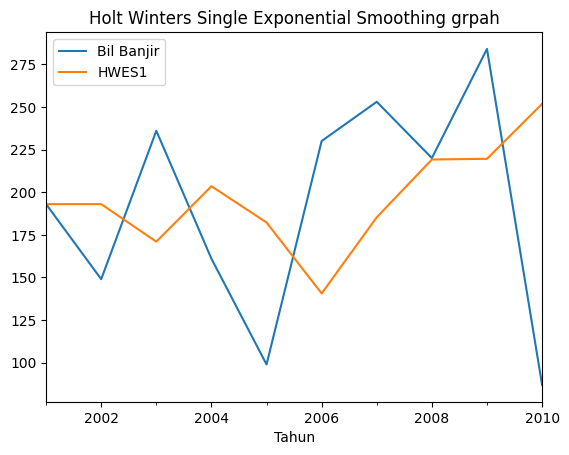

In [5]:
# Single exponential smoothing of the visitors data set
airline['HWES1'] = SimpleExpSmoothing(airline['Bil Banjir']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
airline[['Bil Banjir','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters grapg: Additive Trend and Multiplicative Trend'}, xlabel='Tahun'>

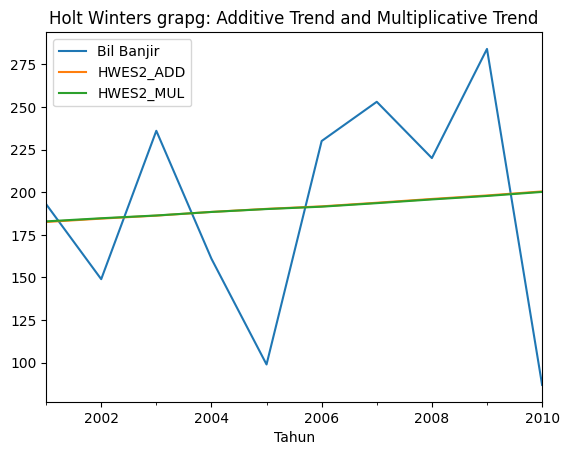

In [6]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
airline['HWES2_ADD'] = ExponentialSmoothing(airline['Bil Banjir'],trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['Bil Banjir'],trend='mul').fit().fittedvalues
airline[['Bil Banjir','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

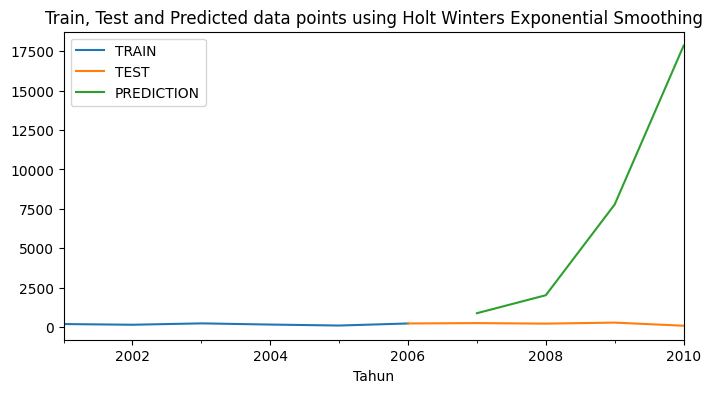

In [16]:
# Split into train and test set
train_visitors = airline[0:6]
test_visitors = airline[5:]
# Fit the model
fitted_model = ExponentialSmoothing(train_visitors['Bil Banjir'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(4)
train_visitors['Bil Banjir'].plot(legend=True,label='TRAIN')
test_visitors['Bil Banjir'].plot(legend=True,label='TEST',figsize=(8,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

In [ ]:
train_visitors

In [11]:
test_visitors

,Bil Banjir,HWES1,HWES2_ADD,HWES2_MUL
Tahun,,,,
2006-01-01,230,140.625000,191.693862,191.503950
2007-01-01,253,185.312500,193.812638,193.567519
2008-01-01,220,219.156250,196.035849,195.757345
2009-01-01,284,219.578125,198.082956,197.790229
2010-01-01,87,251.789062,200.439871,200.157004


In [12]:
print(test_predictions)

2007-01-01      881.347271
2008-01-01     2021.669346
2009-01-01     7779.617671
2010-01-01    17845.195750
2011-01-01    68670.378990
Freq: AS-JAN, dtype: float64


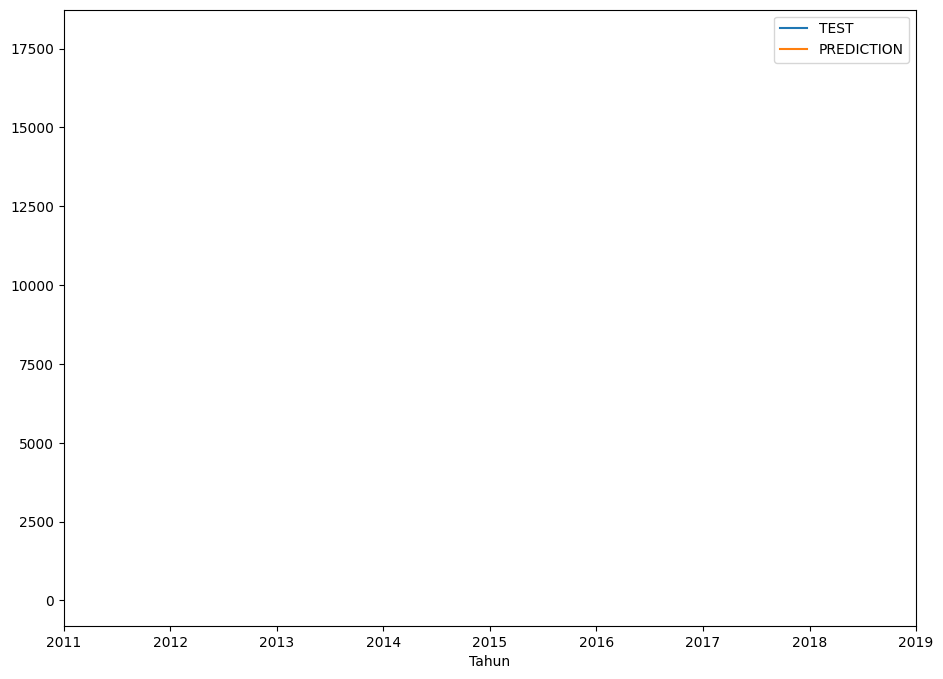

In [18]:
test_visitors['Bil Banjir'].plot(legend=True,label='TEST',figsize=(11,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2011','2019']);

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_visitors,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_visitors,test_predictions)}')

ValueError: ignored